In [ ]:
import os

data_dir = '/kaggle/input/ptb-xl-a-large-scale-ecg/ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.3'

all_files = []

for root, dirs, files in os.walk(data_dir):
    for f in files:
        file_path = os.path.join(root, f)
        all_files.append(file_path)

print(f"✅ Total files found: {len(all_files)}")

print("\n📂 Example file paths:")
for i, path in enumerate(all_files[:15]):
    print(f"{i+1}. {path}")

folder_summary = {}
for f in all_files:
    relative_path = os.path.dirname(f).replace(data_dir, '').strip(os.sep)
    parts = relative_path.split(os.sep)
    folder = parts[0] if len(parts) > 0 and parts[0] != '' else "root"
    folder_summary[folder] = folder_summary.get(folder, 0) + 1

print("\n📊 File count by top-level folder:")
for k, v in folder_summary.items():
    print(f"{k:20s} : {v}")


✅ Total files found: 87204

📂 Example file paths:
1. /kaggle/input/ptb-xl-a-large-scale-ecg/ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.3/SHA256SUMS.txt
2. /kaggle/input/ptb-xl-a-large-scale-ecg/ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.3/RECORDS
3. /kaggle/input/ptb-xl-a-large-scale-ecg/ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.3/example_physionet.py
4. /kaggle/input/ptb-xl-a-large-scale-ecg/ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.3/ptbxl_v103_changelog.txt
5. /kaggle/input/ptb-xl-a-large-scale-ecg/ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.3/scp_statements.csv
6. /kaggle/input/ptb-xl-a-large-scale-ecg/ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.3/ptbxl_database.csv
7. /kaggle/input/ptb-xl-a-large-scale-ecg/ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.3/LICENSE.txt
8. /kaggle/input/ptb-xl-a-large-scale-ecg/ptb-xl-a-large-publ

In [2]:
!pip install wfdb

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.8/163.8 kB 9.6 MB/s eta 0:00:00


In [ ]:
import wfdb
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd


data_dir = '/kaggle/input/ptb-xl-a-large-scale-ecg/ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.3'

metadata_path = os.path.join(data_dir, 'ptbxl_database.csv')
df = pd.read_csv(metadata_path)

print("✅ Metadata loaded successfully!")
print(f"Total records: {len(df)}")
print(df.head(3))

sample_row = df.iloc[0]
record_path = os.path.join(data_dir, sample_row['filename_lr'])

print("\n📄 Selected record path:", record_path)

record = wfdb.rdrecord(record_path)

print("Signal shape:", record.p_signal.shape)
print("Number of signals (leads):", record.n_sig)
print("Signal names:", record.sig_name)


✅ Metadata loaded successfully!
Total records: 21799
   ecg_id  patient_id   age  sex  height  weight  nurse  site     device  \
0       1     15709.0  56.0    1     NaN    63.0    2.0   0.0  CS-12   E   
1       2     13243.0  19.0    0     NaN    70.0    2.0   0.0  CS-12   E   
2       3     20372.0  37.0    1     NaN    69.0    2.0   0.0  CS-12   E   

        recording_date  ... validated_by_human baseline_drift static_noise  \
0  1984-11-09 09:17:34  ...               True            NaN    , I-V1,     
1  1984-11-14 12:55:37  ...               True            NaN          NaN   
2  1984-11-15 12:49:10  ...               True            NaN          NaN   

  burst_noise electrodes_problems  extra_beats  pacemaker  strat_fold  \
0         NaN                 NaN          NaN        NaN           3   
1         NaN                 NaN          NaN        NaN           2   
2         NaN                 NaN          NaN        NaN           5   

                 filename_lr        

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


Found 21799 records


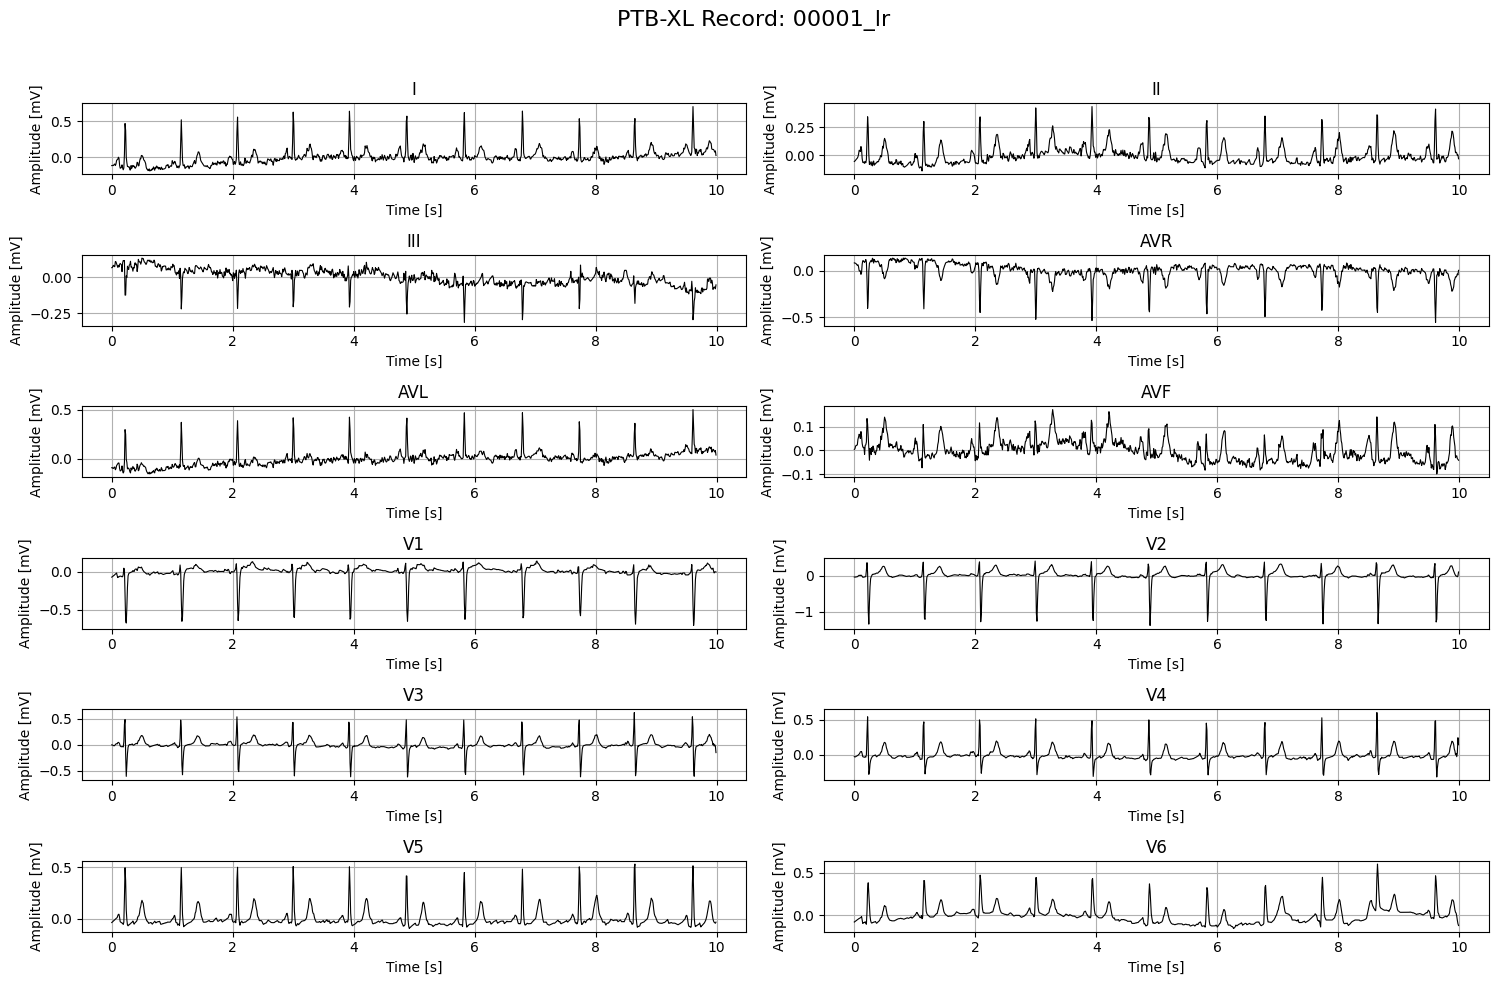

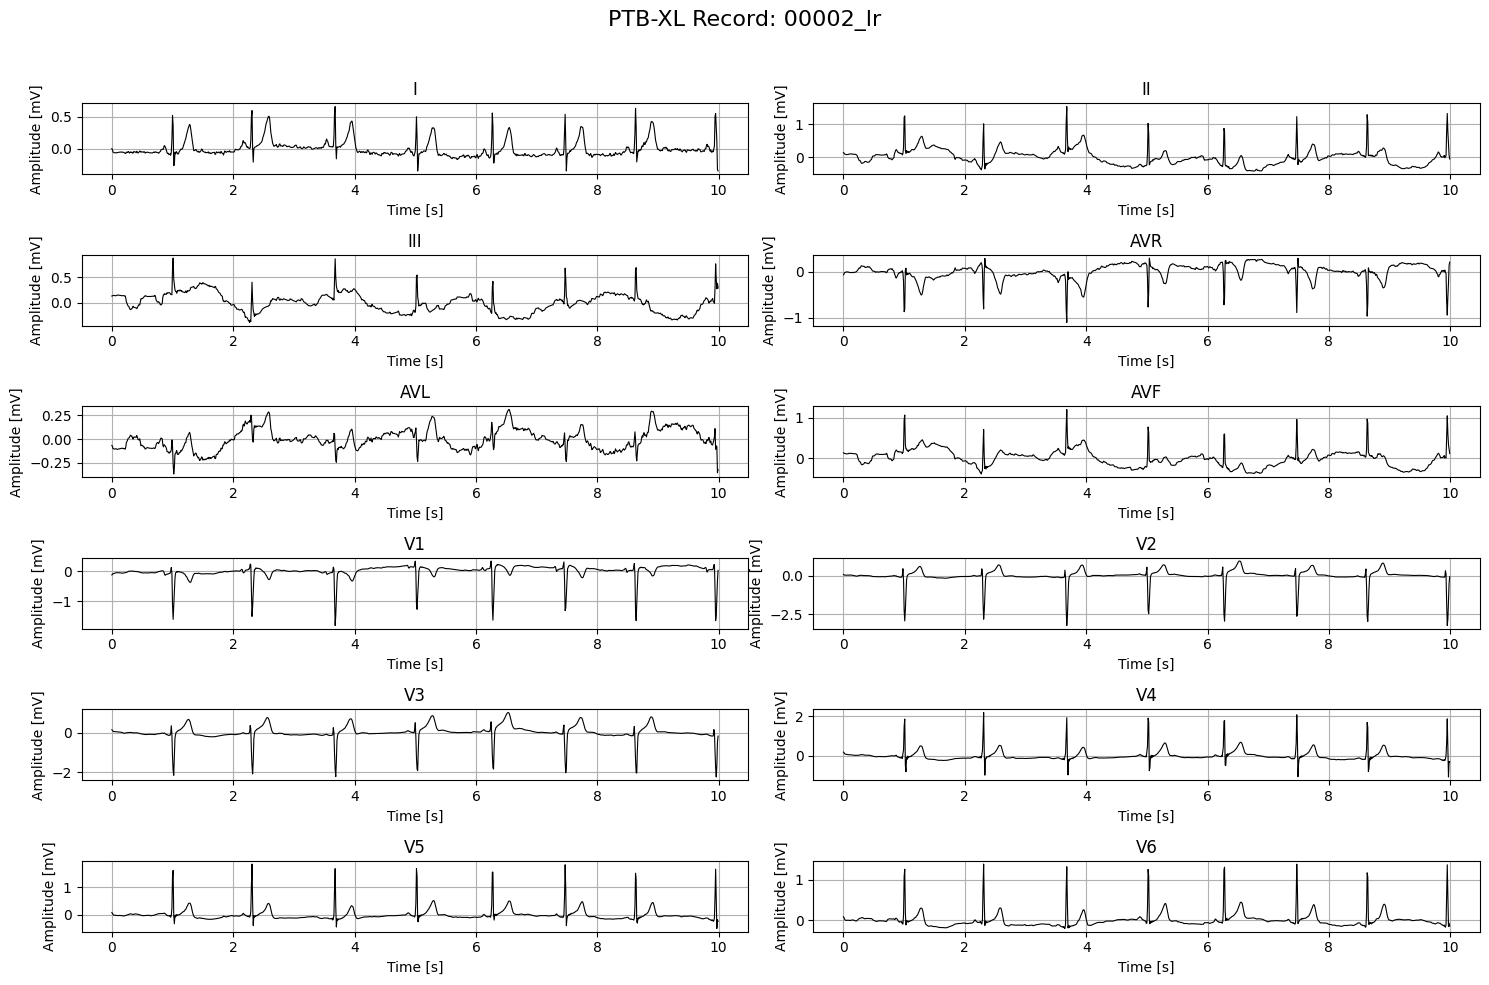

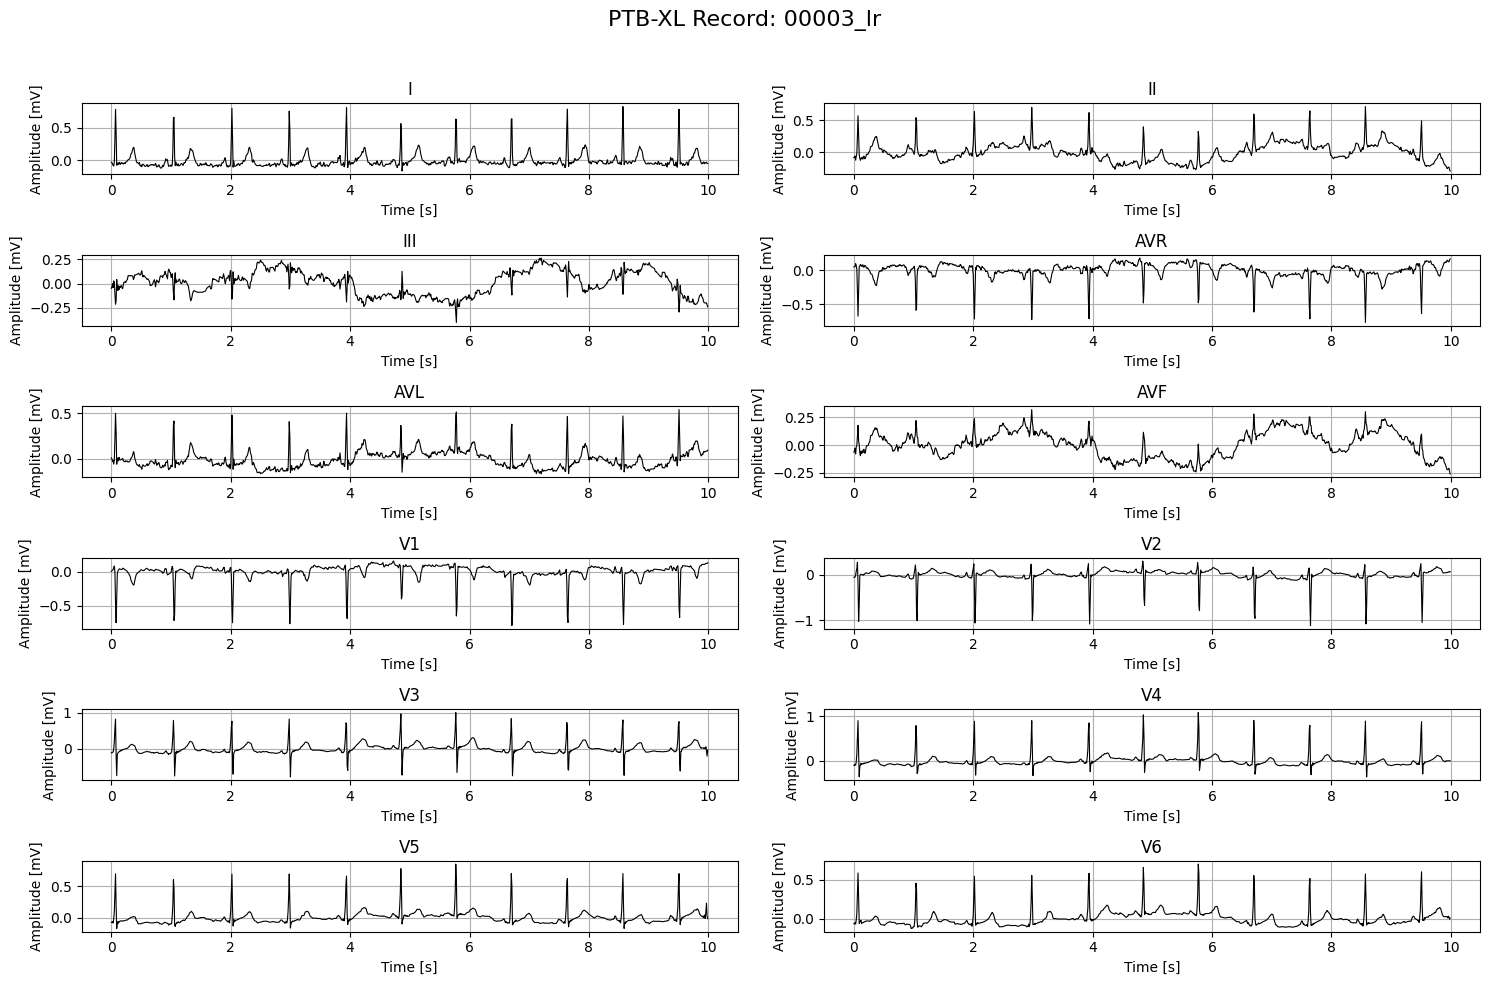

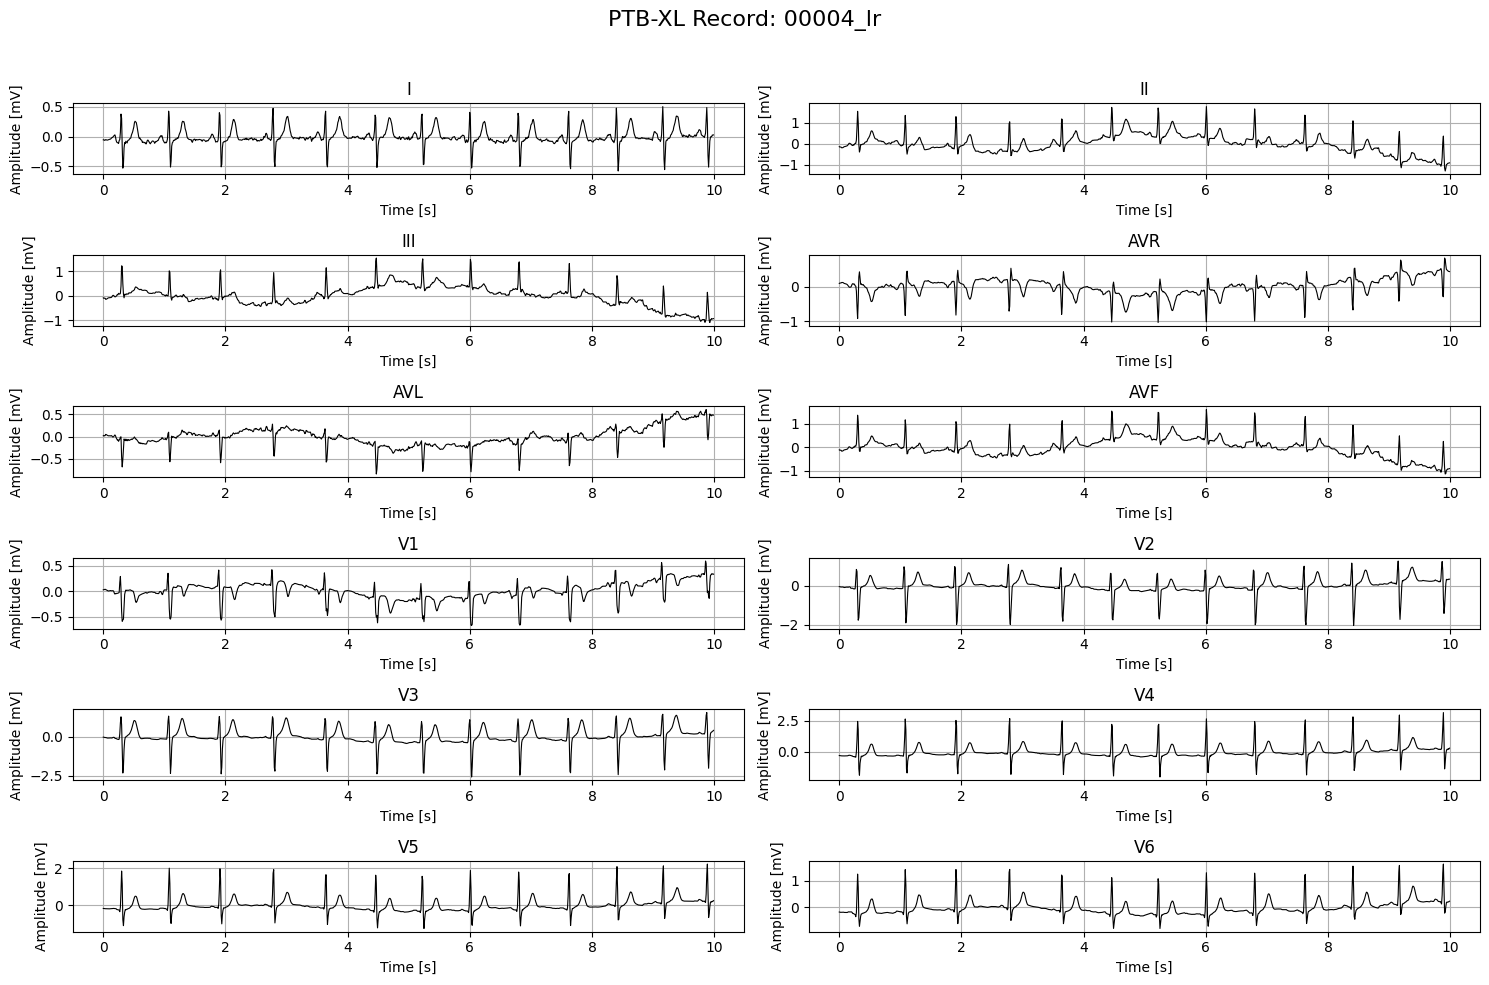

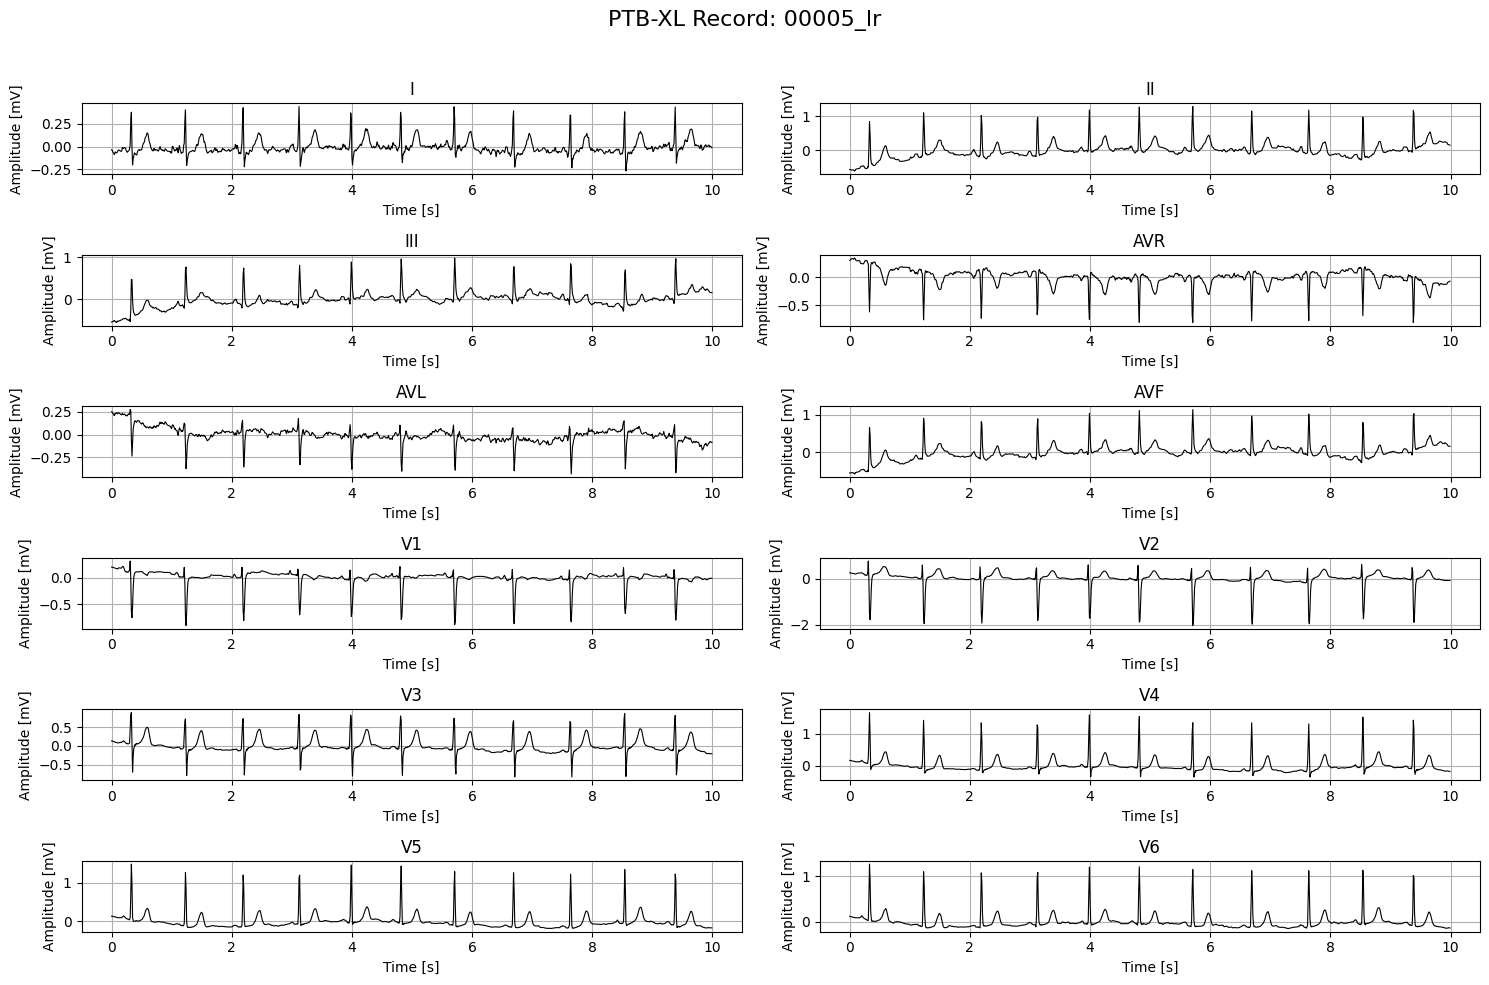

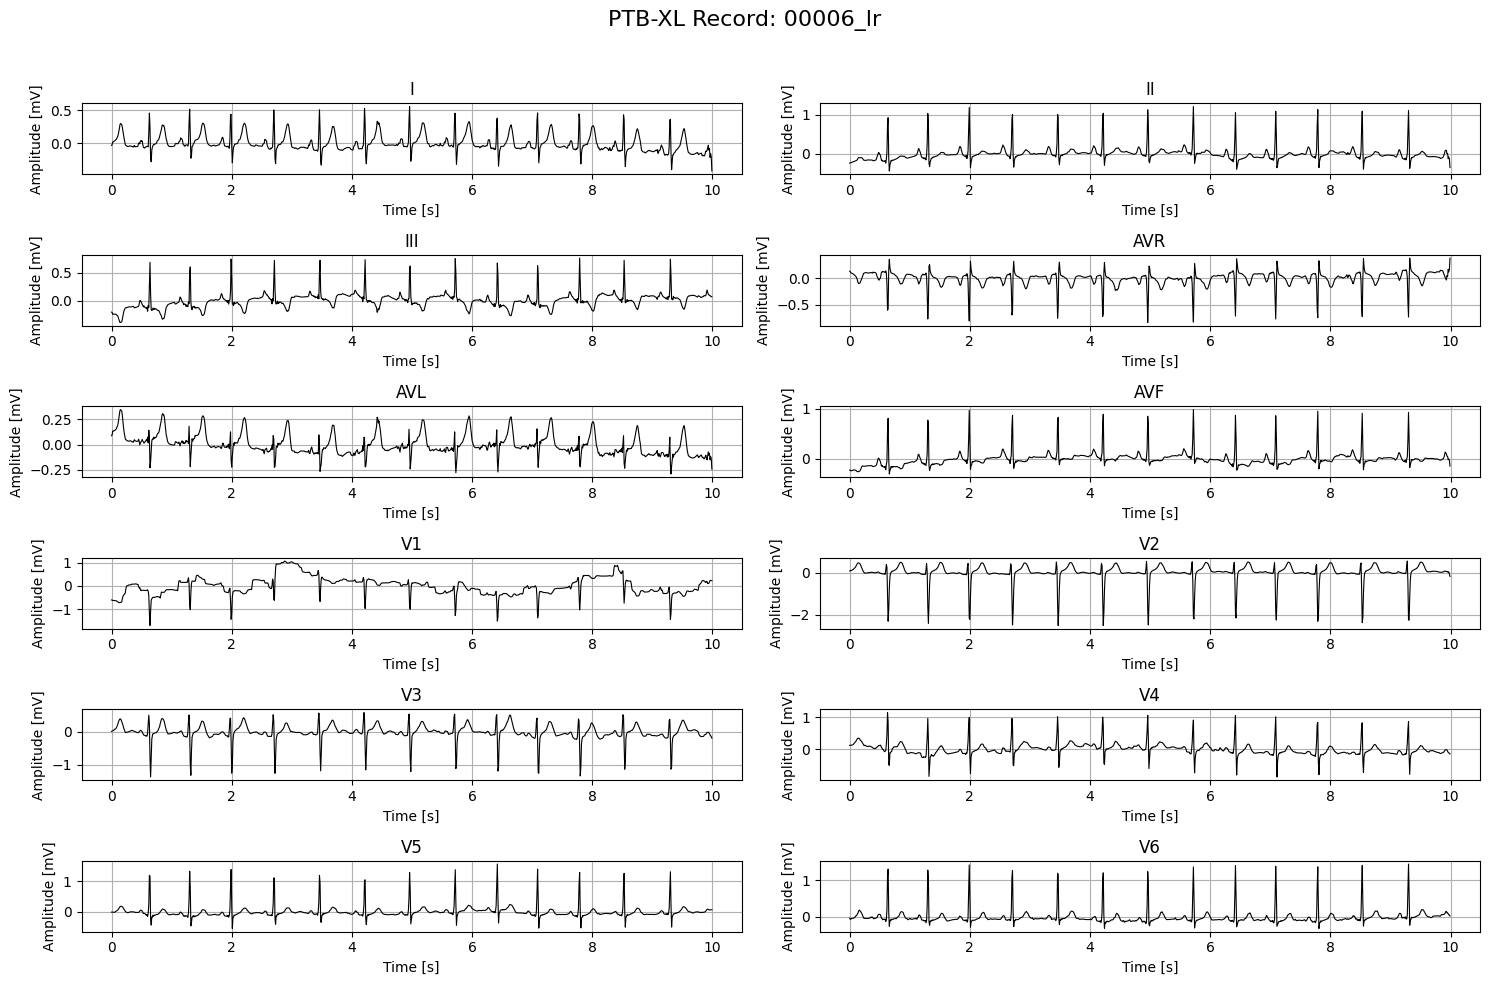

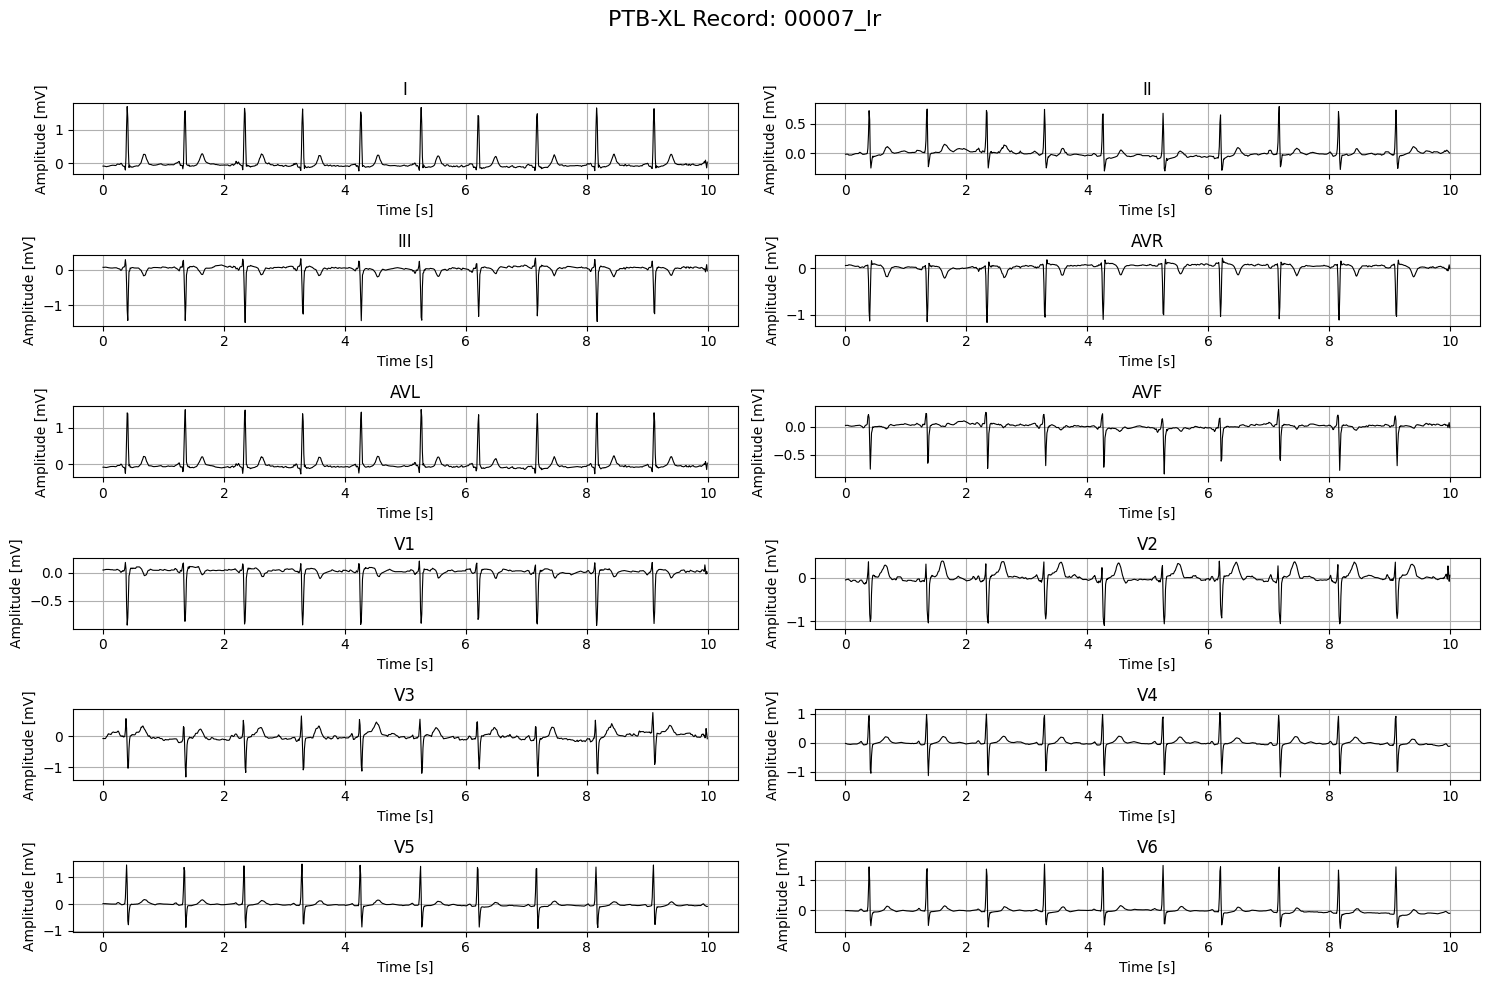

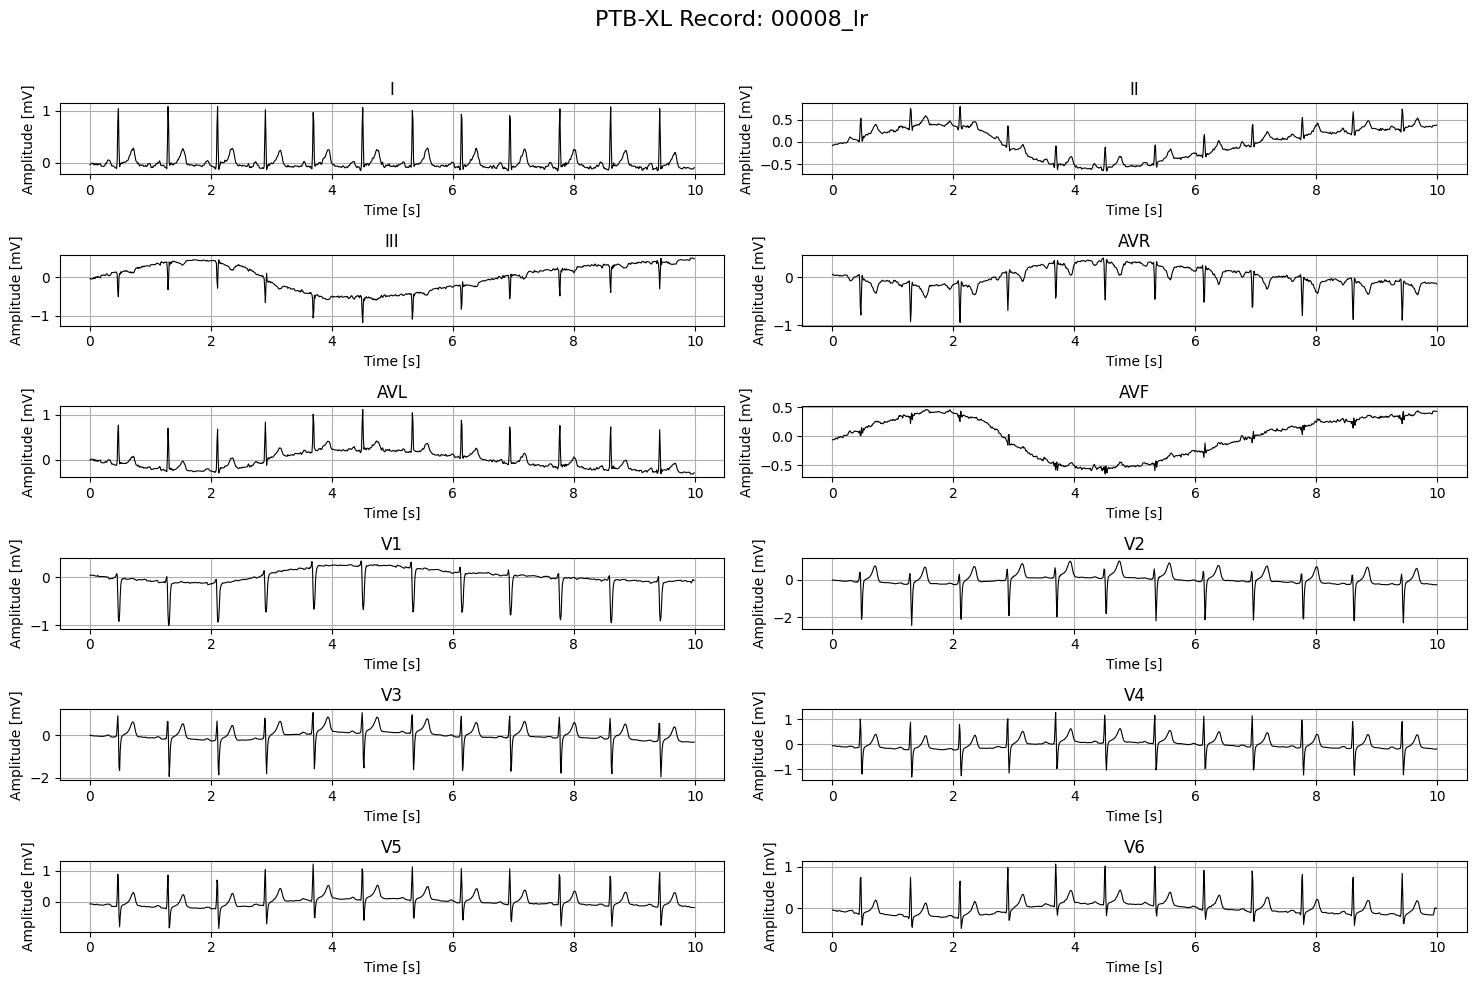

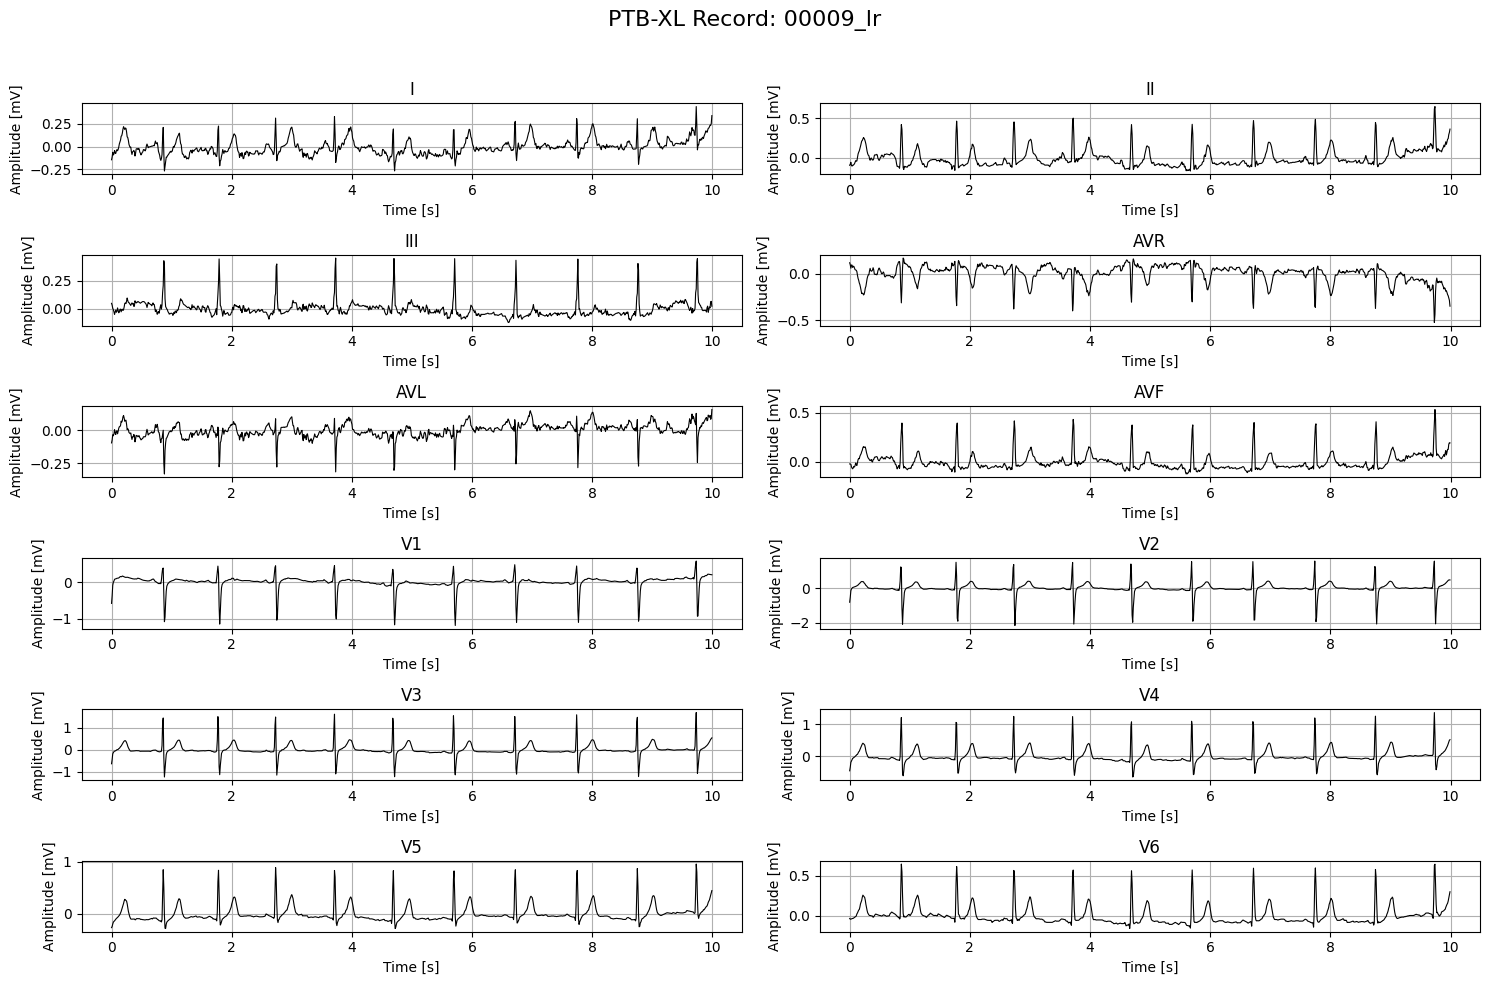

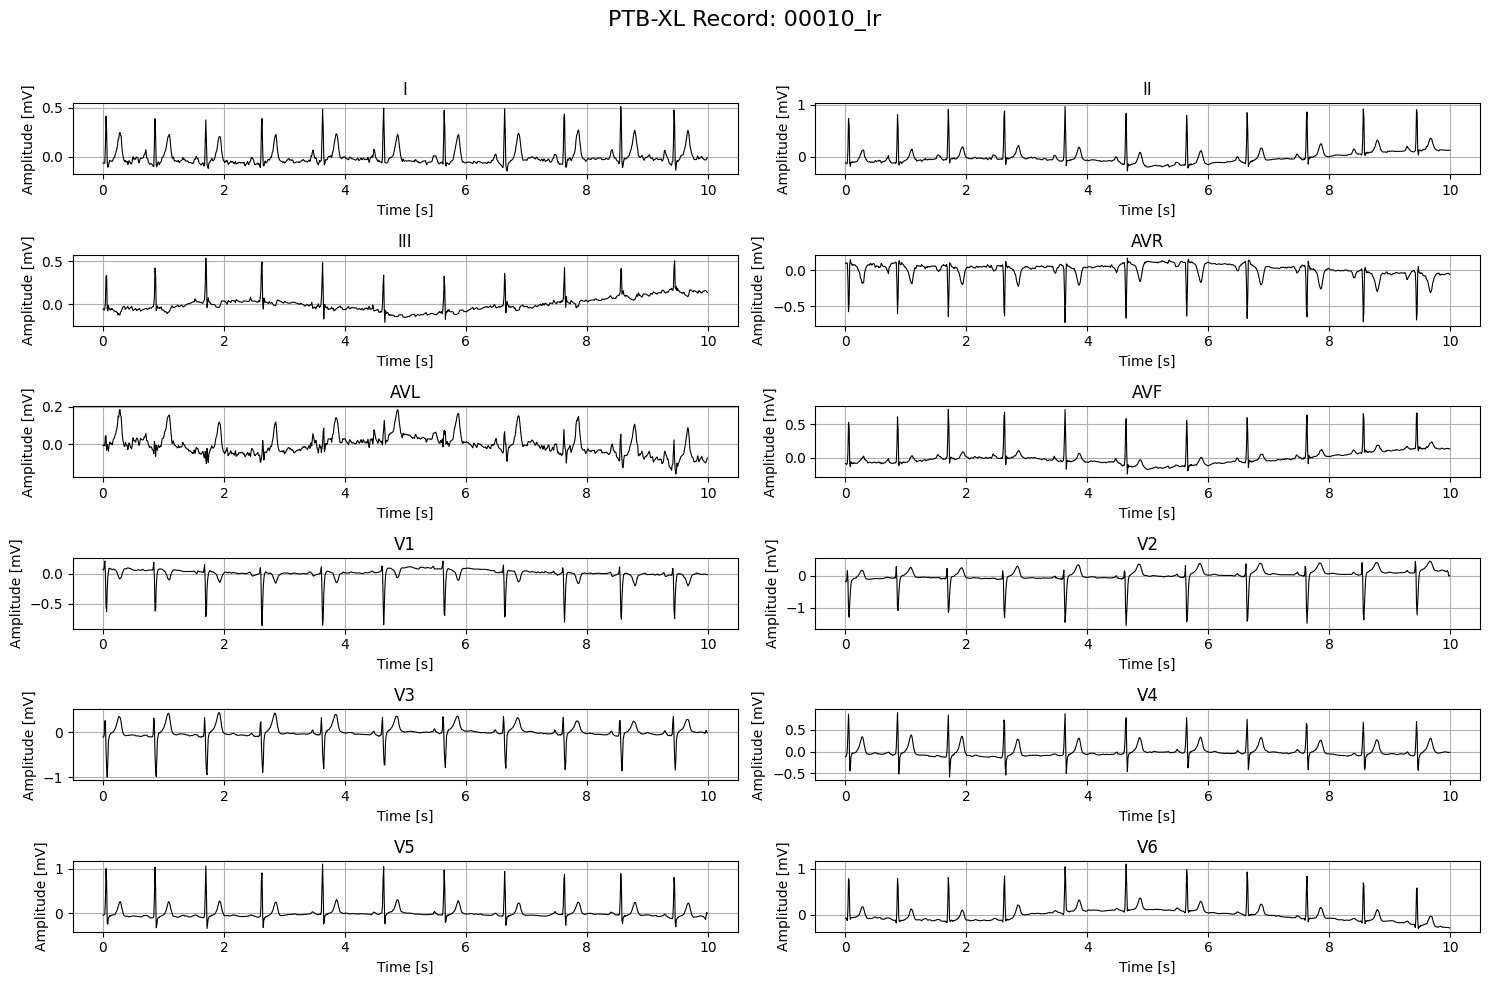

In [ ]:
import os
import wfdb
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data_dir = '/kaggle/input/ptb-xl-a-large-scale-ecg/ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.3'

metadata_path = os.path.join(data_dir, 'ptbxl_database.csv')
df = pd.read_csv(metadata_path)

record_paths = df['filename_lr'].apply(lambda x: os.path.join(data_dir, x)).tolist()
print(f"Found {len(record_paths)} records")

for record_path in record_paths[:10]:
    try:
        record = wfdb.rdrecord(record_path)
        signal = record.p_signal
        fs = record.fs
        leads = record.sig_name
        n_samples = signal.shape[0]
        t = np.arange(n_samples) / fs
        
        plt.figure(figsize=(15, 10))
        for i in range(signal.shape[1]):
            plt.subplot(6, 2, i + 1)
            plt.plot(t, signal[:, i], color='black', linewidth=0.8)
            plt.title(leads[i])
            plt.xlabel("Time [s]")
            plt.ylabel("Amplitude [mV]")
            plt.grid(True)

        plt.suptitle(f"PTB-XL Record: {os.path.basename(record_path)}", fontsize=16)
        plt.tight_layout(rect=[0, 0, 1, 0.96])
        plt.show()

    except Exception as e:
        print(f"⚠️ Could not load {record_path}: {e}")


In [ ]:
import os
import wfdb
import numpy as np
import pandas as pd

data_dir = '/kaggle/input/ptb-xl-a-large-scale-ecg/ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.3'
metadata_path = os.path.join(data_dir, 'ptbxl_database.csv')

df = pd.read_csv(metadata_path)
print(f"✅ Metadata loaded: {len(df)} records available")

record_path = os.path.join(data_dir, df.iloc[0]['filename_lr'])
print(f"🎯 Loading record: {record_path}")

record = wfdb.rdrecord(record_path)
print("Leads:", record.sig_name)
print("Sampling frequency:", record.fs)
print("Signal shape:", record.p_signal.shape)

signal_data = record.p_signal
signal_df = pd.DataFrame(signal_data, columns=record.sig_name)

def signal_integrity(x):
    return {
        'range': np.max(x) - np.min(x),
        'num_nan': np.isnan(x).sum()
    }

desc_stats = signal_df.describe().T
desc_stats['skewness'] = signal_df.skew()
desc_stats['kurtosis'] = signal_df.kurtosis()

integrity_stats = pd.DataFrame({
    lead: signal_integrity(signal_df[lead]) for lead in signal_df.columns
}).T

full_stats = pd.concat([desc_stats, integrity_stats], axis=1)

full_stats = full_stats.round(4)

display(full_stats)


✅ Metadata loaded: 21799 records available
🎯 Loading record: /kaggle/input/ptb-xl-a-large-scale-ecg/ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.3/records100/00000/00001_lr
Leads: ['I', 'II', 'III', 'AVR', 'AVL', 'AVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6']
Sampling frequency: 100
Signal shape: (1000, 12)


count    mean     std    min     25%     50%     75%    max  skewness  \
I    1000.0  0.0015  0.1091 -0.195 -0.0490 -0.0090  0.0312  0.706    2.3500   
II   1000.0  0.0007  0.0833 -0.140 -0.0570 -0.0235  0.0300  0.435    1.8265   
III  1000.0 -0.0008  0.0588 -0.312 -0.0400  0.0020  0.0410  0.130   -0.8334   
AVR  1000.0 -0.0011  0.0924 -0.559 -0.0270  0.0160  0.0490  0.138   -2.2664   
AVL  1000.0  0.0012  0.0770 -0.155 -0.0420  0.0000  0.0300  0.500    2.0849   
AVF  1000.0  0.0000  0.0469 -0.100 -0.0360 -0.0075  0.0270  0.172    0.7578   
V1   1000.0 -0.0017  0.1132 -0.704 -0.0090  0.0150  0.0400  0.142   -4.0197   
V2   1000.0  0.0070  0.2143 -1.377 -0.0232  0.0110  0.0680  0.410   -3.8670   
V3   1000.0 -0.0018  0.1179 -0.618 -0.0350 -0.0100  0.0210  0.620   -0.8258   
V4   1000.0 -0.0041  0.0955 -0.315 -0.0440 -0.0250  0.0020  0.599    2.2474   
V5   1000.0 -0.0006  0.0892 -0.097 -0.0450 -0.0300  0.0010  0.530    3.1708   
V6   1000.0  0.0008  0.1020 -0.155 -0.0690 -0.0110  0.0330  0.602    1.8427   

     kurtosis  range  num_nan  
I     10.1579  0.901      0.0  
II     4.3289  0.575      0.0  
III    2.5320  0.442      0.0  
AVR    8.2388  0.697      0.0  
AVL    9.5942  0.655      0.0  
AVF    0.3757  0.272      0.0  
V1    18.0713  0.846      0.0  
V2    19.7953  1.787      0.0  
V3    11.2374  1.238      0.0  
V4    10.6179  0.914      0.0  
V5    12.2147  0.627      0.0  
V6     5.1477  0.757      0.0

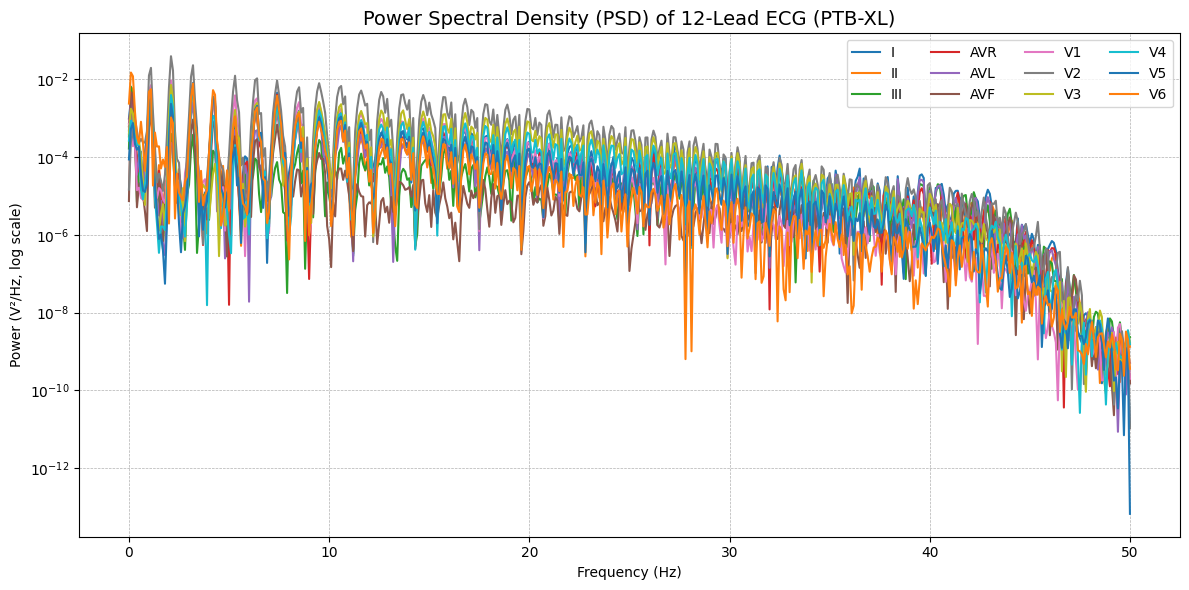

In [ ]:
from scipy.signal import welch
import matplotlib.pyplot as plt

lead_names = ['I', 'II', 'III', 'AVR', 'AVL', 'AVF',
              'V1', 'V2', 'V3', 'V4', 'V5', 'V6']

plt.figure(figsize=(12, 6))

for lead in lead_names:
    if lead in signal_df.columns:
        x = signal_df[lead].values
        nperseg = min(1024, len(x))
        f, Pxx = welch(x, fs=record.fs, nperseg=nperseg)
        plt.semilogy(f, Pxx, label=lead)

plt.title("Power Spectral Density (PSD) of 12-Lead ECG (PTB-XL)", fontsize=14)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power (V²/Hz, log scale)")
plt.legend(ncol=4)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


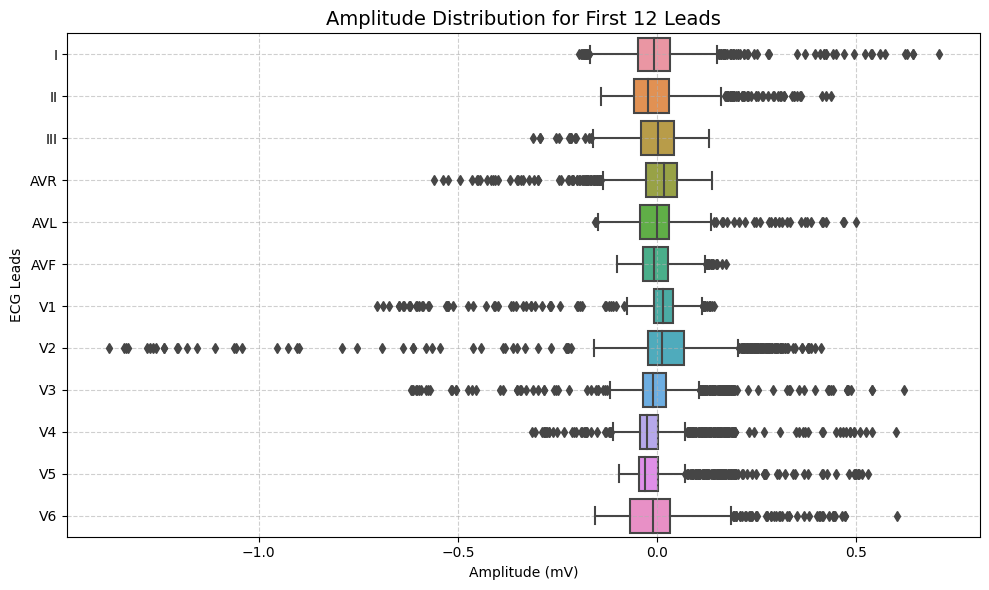

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(data=signal_df.iloc[:, :12], orient='h')

plt.title("Amplitude Distribution for First 12 Leads", fontsize=14)
plt.xlabel("Amplitude (mV)")
plt.ylabel("ECG Leads")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


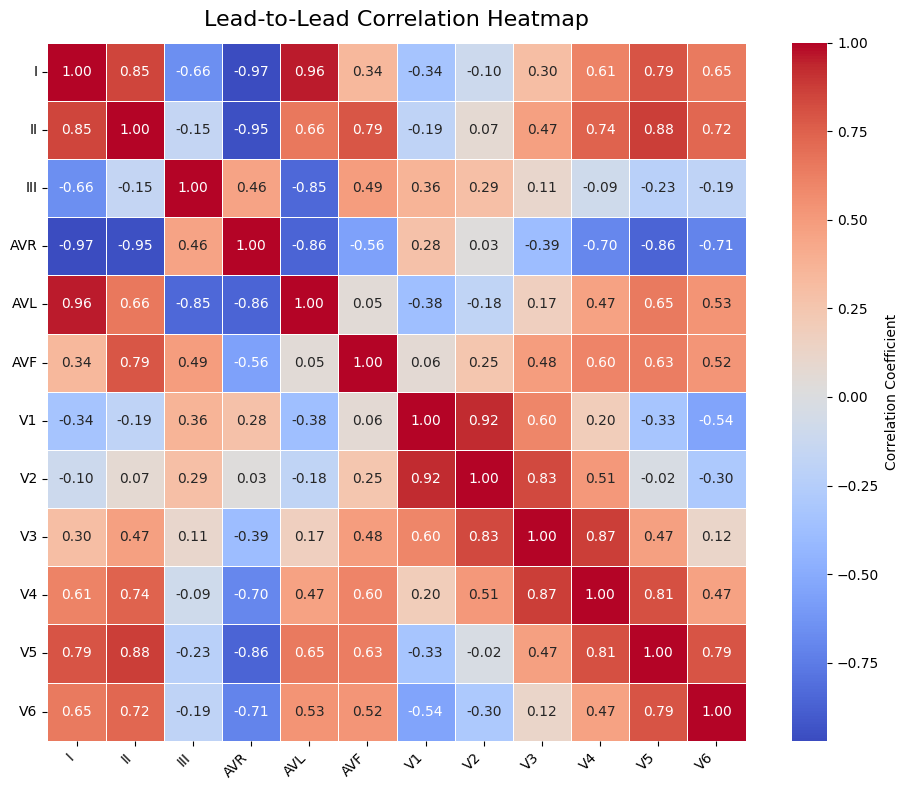

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

corr = signal_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(
    corr,
    cmap="coolwarm",          
    annot=True,               
    fmt=".2f",                
    linewidths=0.5,           
    square=True,              
    cbar_kws={'label': 'Correlation Coefficient'}
)

plt.title("Lead-to-Lead Correlation Heatmap", fontsize=16, pad=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


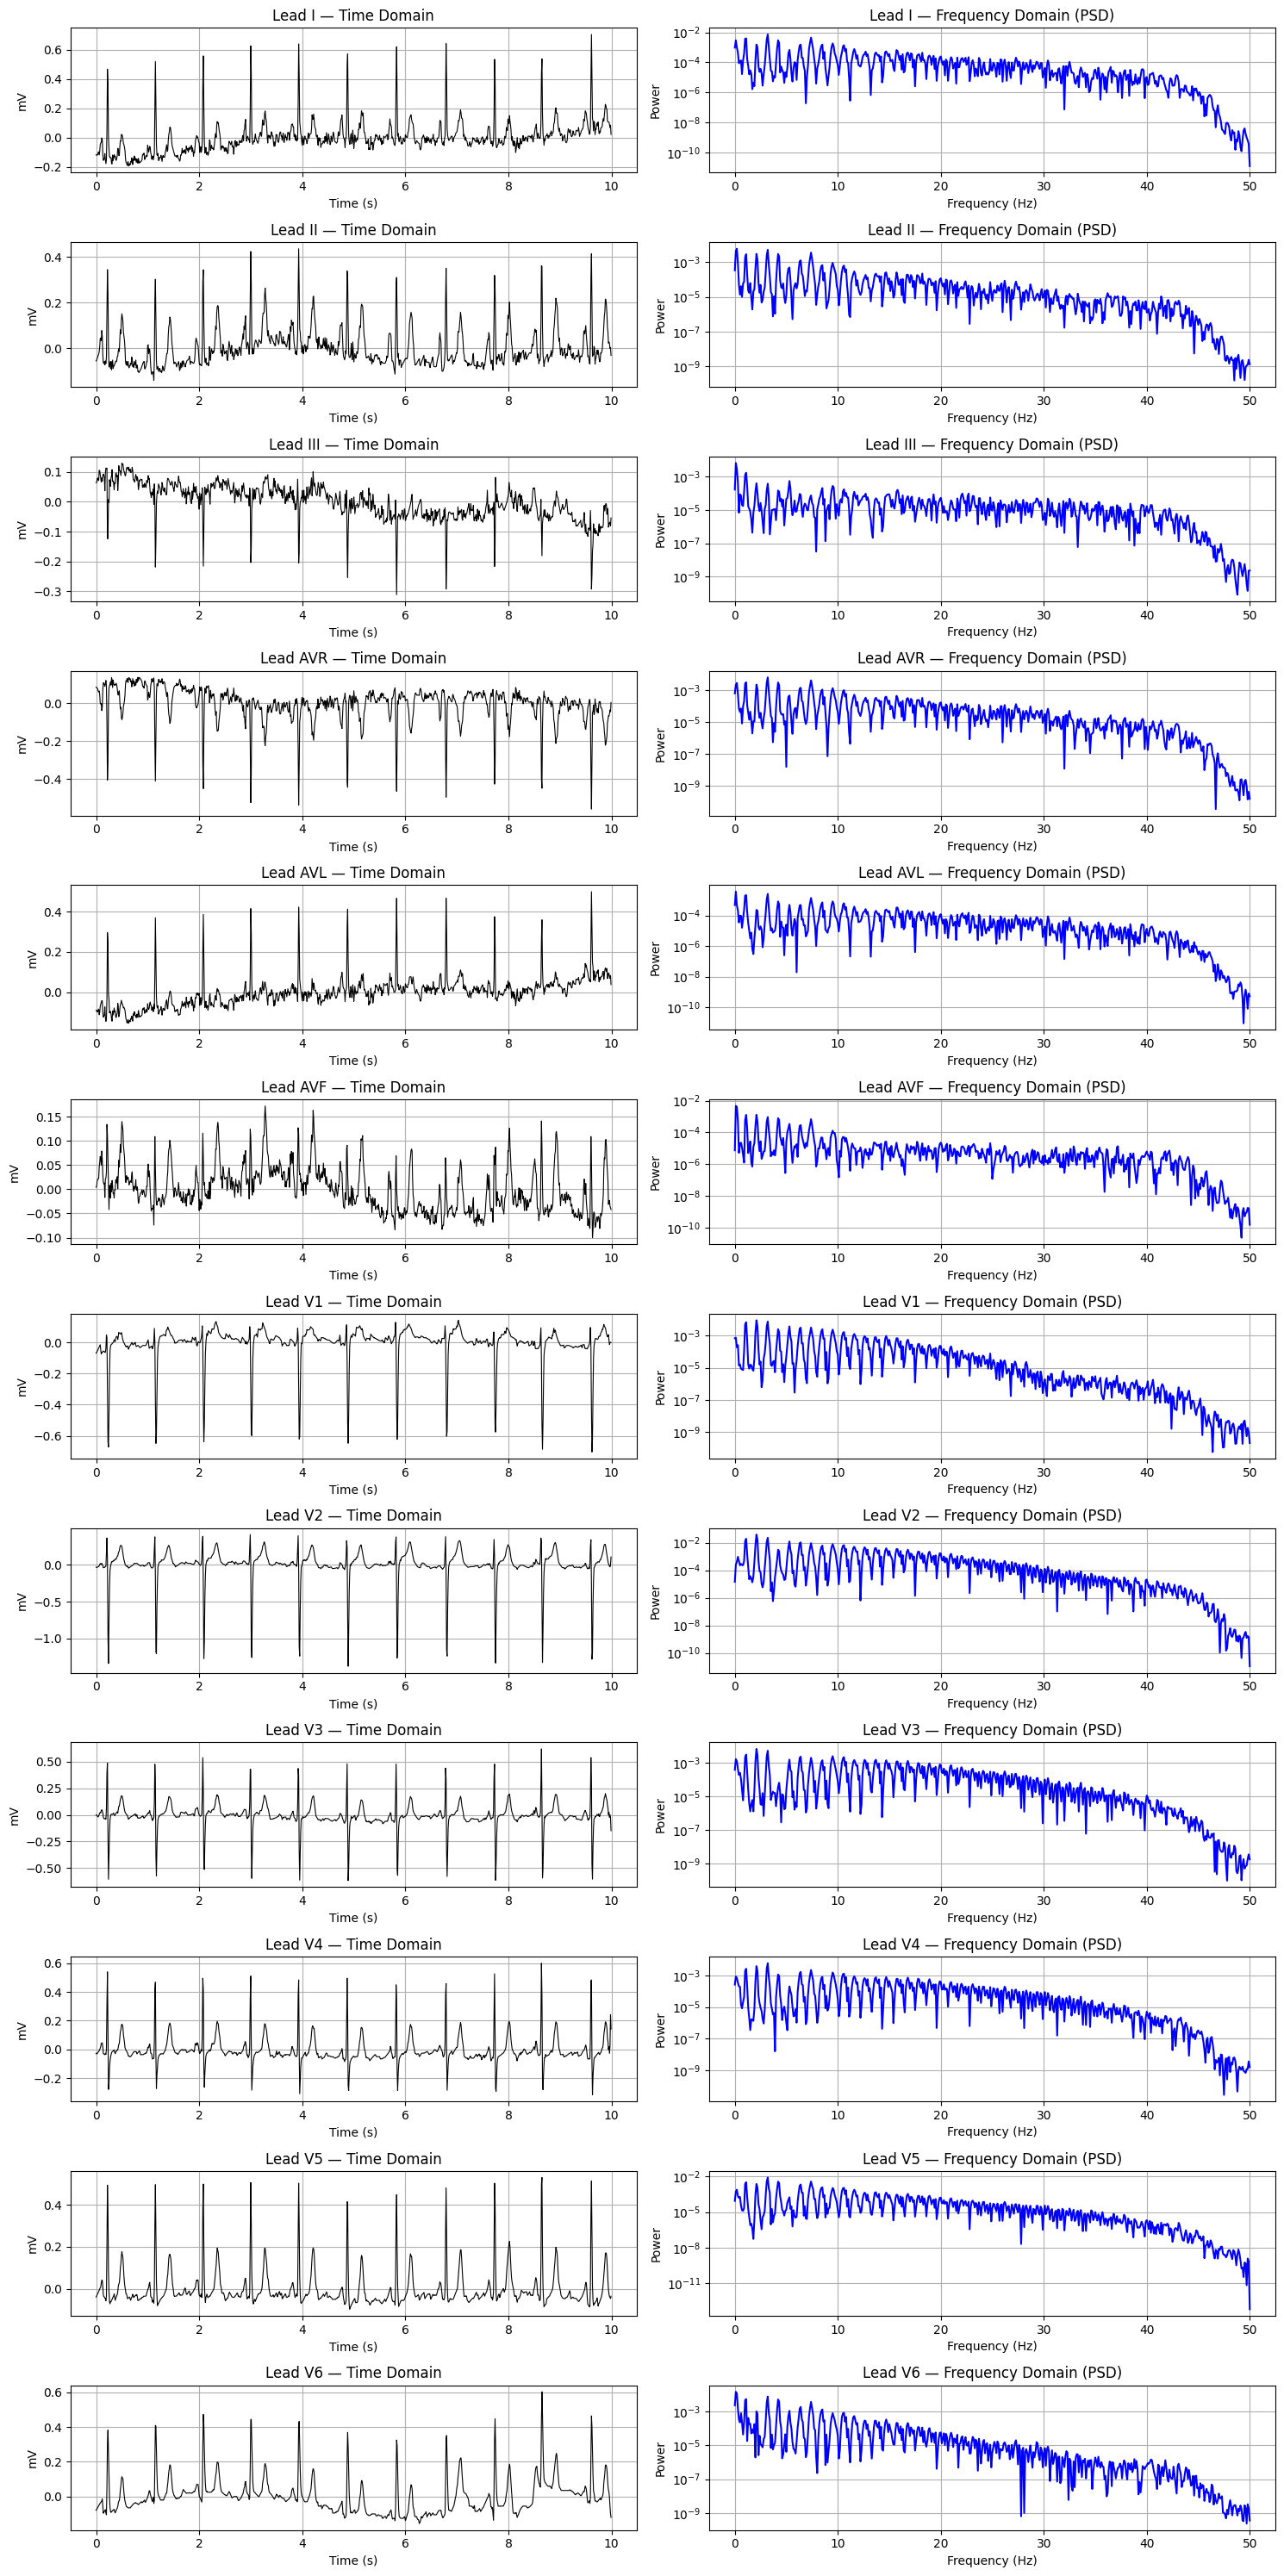

In [ ]:
import matplotlib.pyplot as plt
from scipy.signal import welch
import numpy as np

leads = signal_df.columns
fs = record.fs
n_leads = len(leads)

plt.figure(figsize=(15, 30))

for i, lead in enumerate(leads):
    signal = signal_df[lead].values
    nperseg = min(1024, len(signal)) 
    plt.subplot(n_leads, 2, i*2 + 1)
    plt.plot(np.arange(len(signal)) / fs, signal, color='black', linewidth=0.8)
    plt.title(f"Lead {lead} — Time Domain")
    plt.xlabel("Time (s)")
    plt.ylabel("mV")
    plt.grid(True)

    plt.subplot(n_leads, 2, i*2 + 2)
    f, Pxx = welch(signal, fs=fs, nperseg=nperseg)
    plt.semilogy(f, Pxx, color='blue')
    plt.title(f"Lead {lead} — Frequency Domain (PSD)")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Power")
    plt.grid(True)

plt.tight_layout()
plt.show()


Learning initial signal parameters...
Found 8 beats during learning. Initializing using learned parameters
Running QRS detection...
QRS detection complete.


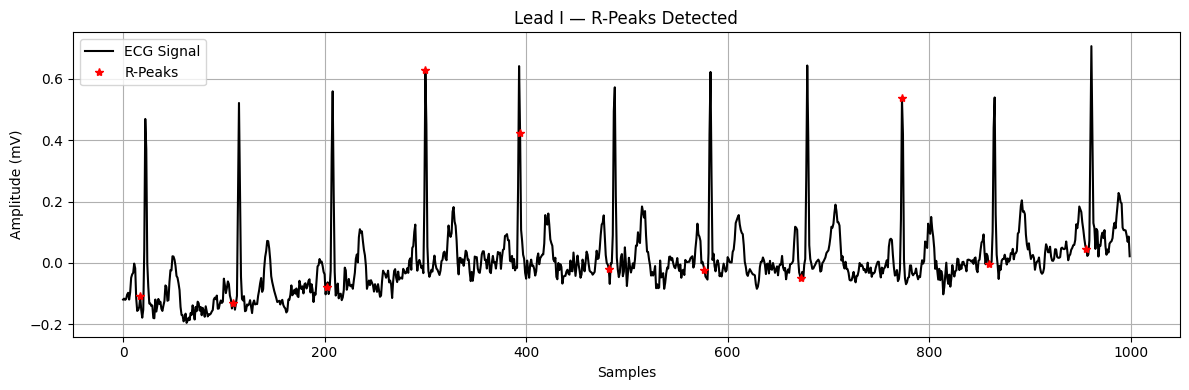

Lead I — Avg Heart Rate: 64.0 bpm, Std: 2.9 bpm
Learning initial signal parameters...
Found 8 beats during learning. Initializing using learned parameters
Running QRS detection...
QRS detection complete.


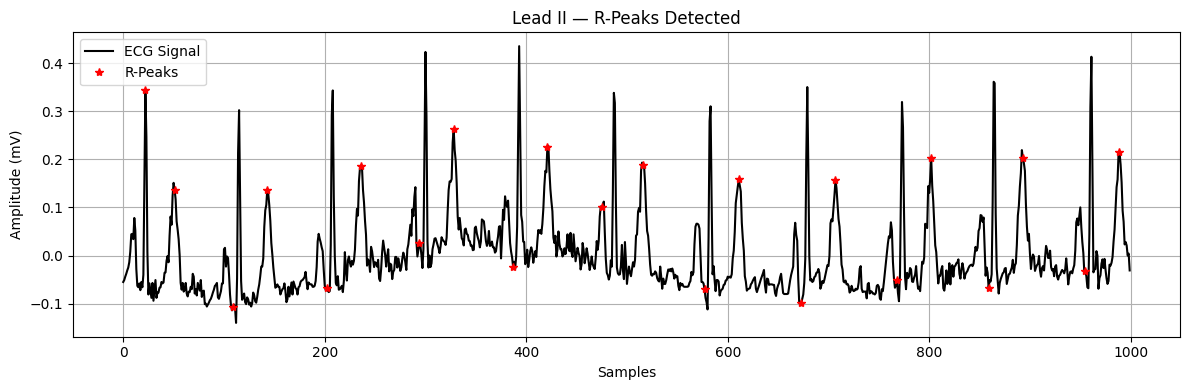

Lead II — Avg Heart Rate: 141.1 bpm, Std: 38.9 bpm
Learning initial signal parameters...
Found 8 beats during learning. Initializing using learned parameters
Running QRS detection...
QRS detection complete.


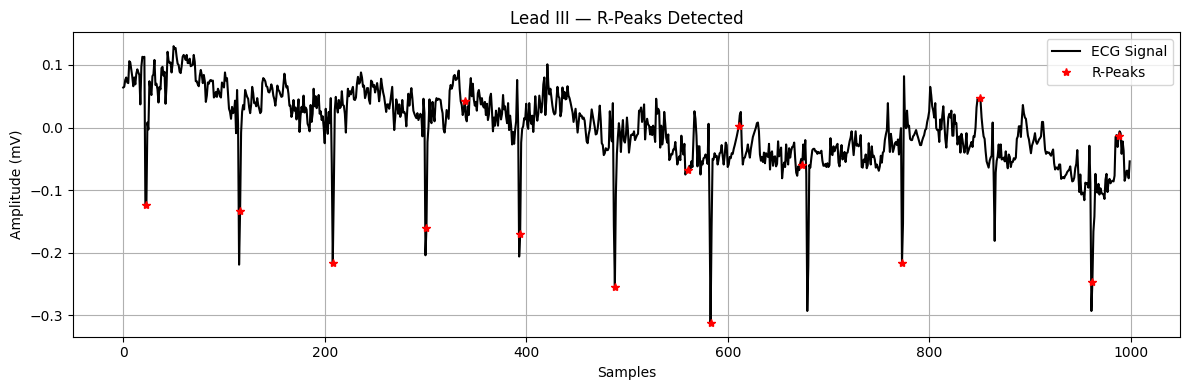

Lead III — Avg Heart Rate: 115.2 bpm, Std: 70.6 bpm
Learning initial signal parameters...
Found 8 beats during learning. Initializing using learned parameters
Running QRS detection...
QRS detection complete.


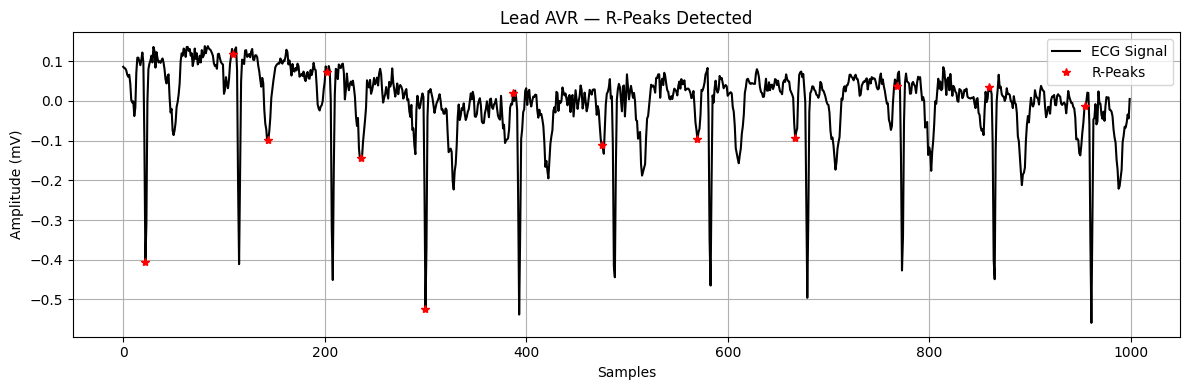

Lead AVR — Avg Heart Rate: 88.7 bpm, Std: 40.2 bpm
Learning initial signal parameters...
Found 8 beats during learning. Initializing using learned parameters
Running QRS detection...
QRS detection complete.


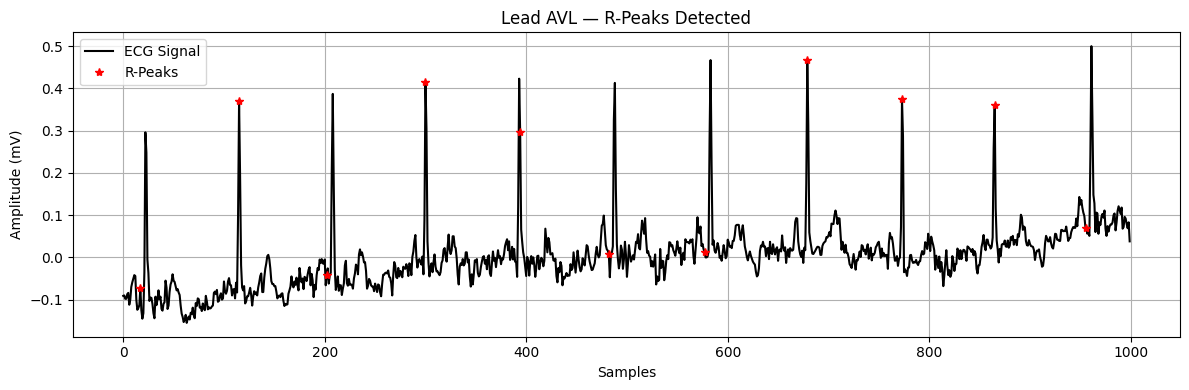

Lead AVL — Avg Heart Rate: 64.0 bpm, Std: 3.0 bpm
Learning initial signal parameters...
Found 8 beats during learning. Initializing using learned parameters
Running QRS detection...
QRS detection complete.


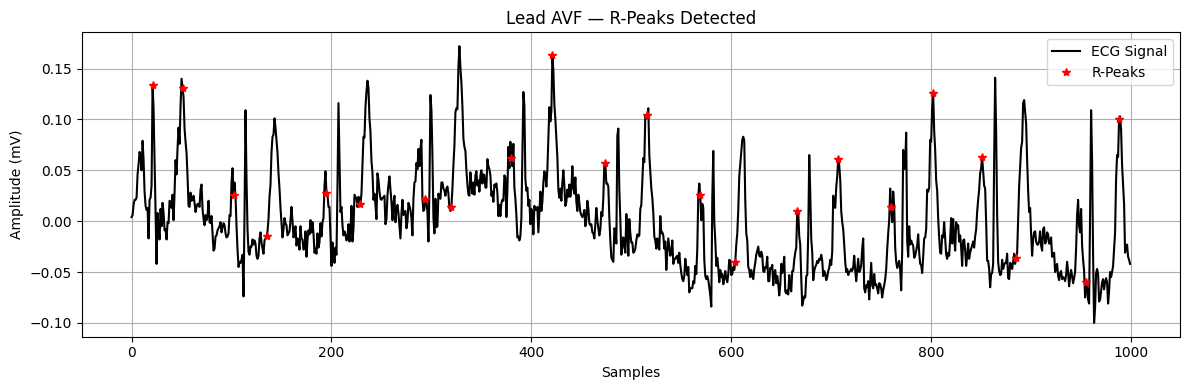

Lead AVF — Avg Heart Rate: 140.6 bpm, Std: 39.2 bpm
Learning initial signal parameters...
Found 8 beats during learning. Initializing using learned parameters
Running QRS detection...
QRS detection complete.


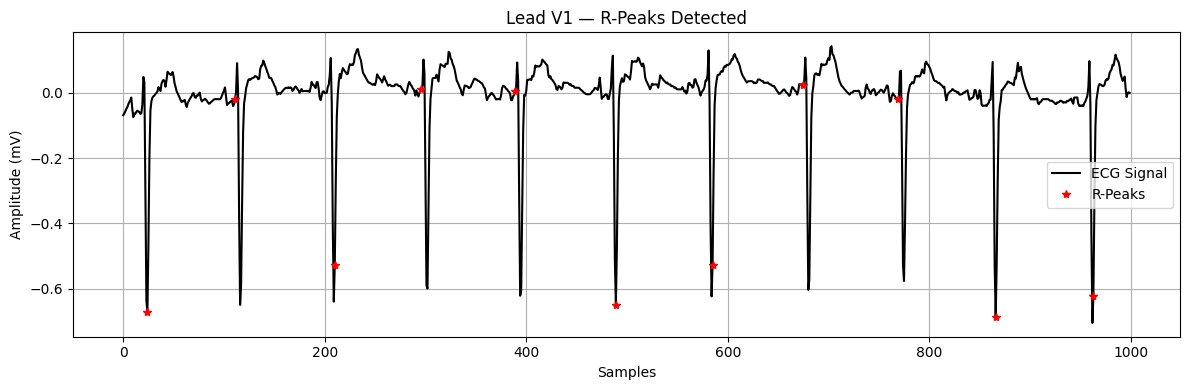

Lead V1 — Avg Heart Rate: 64.1 bpm, Std: 3.2 bpm
Learning initial signal parameters...
Found 8 beats during learning. Initializing using learned parameters
Running QRS detection...
QRS detection complete.


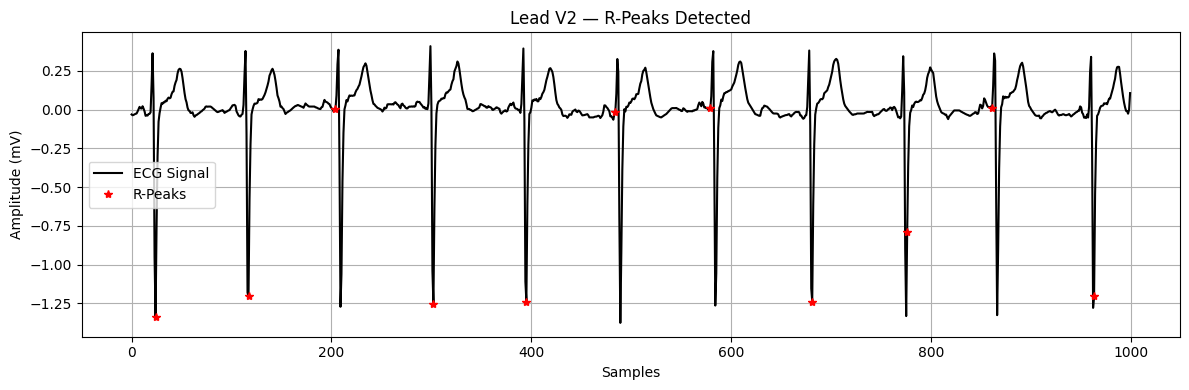

Lead V2 — Avg Heart Rate: 64.1 bpm, Std: 3.8 bpm
Learning initial signal parameters...
Found 8 beats during learning. Initializing using learned parameters
Running QRS detection...
QRS detection complete.


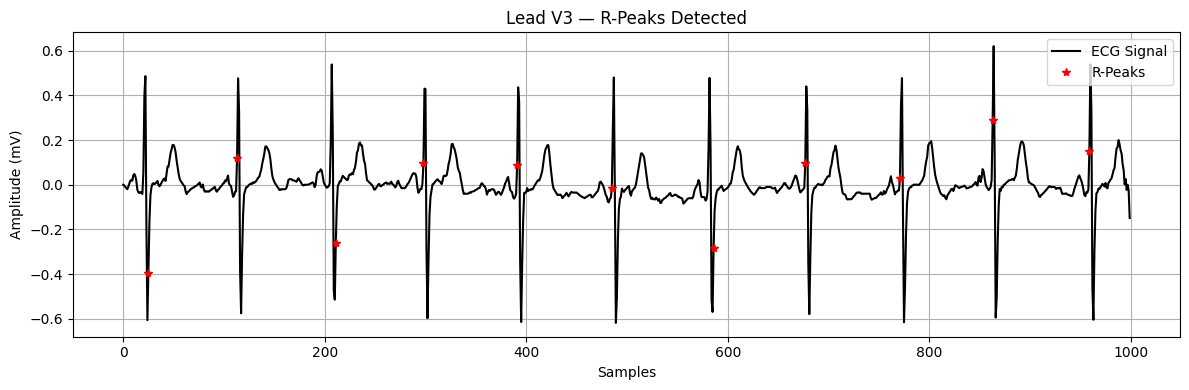

Lead V3 — Avg Heart Rate: 64.4 bpm, Std: 2.8 bpm
Learning initial signal parameters...
Found 8 beats during learning. Initializing using learned parameters
Running QRS detection...
QRS detection complete.


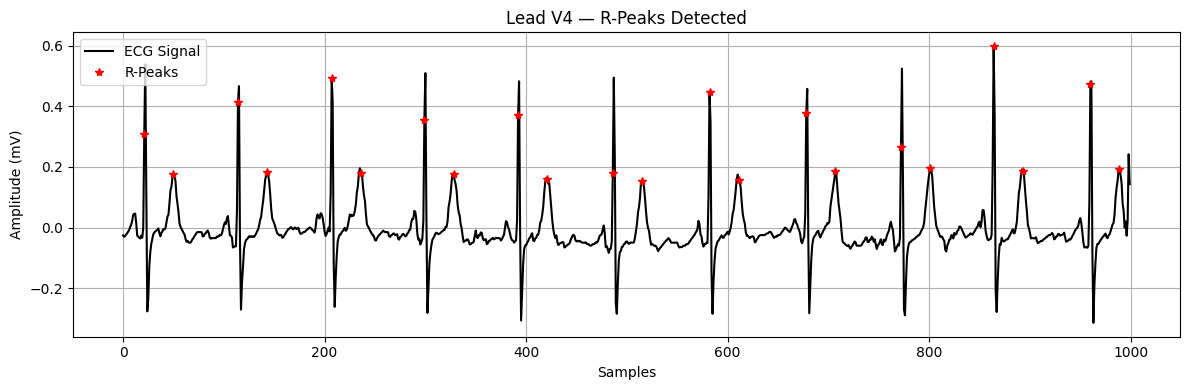

Lead V4 — Avg Heart Rate: 152.8 bpm, Std: 57.5 bpm
Learning initial signal parameters...
Found 8 beats during learning. Initializing using learned parameters
Running QRS detection...
QRS detection complete.


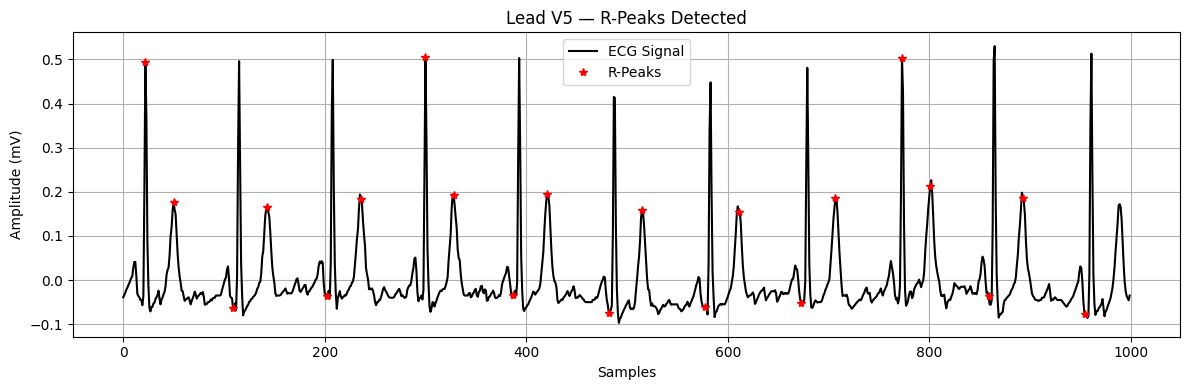

Lead V5 — Avg Heart Rate: 143.3 bpm, Std: 46.7 bpm
Learning initial signal parameters...
Found 8 beats during learning. Initializing using learned parameters
Running QRS detection...
QRS detection complete.


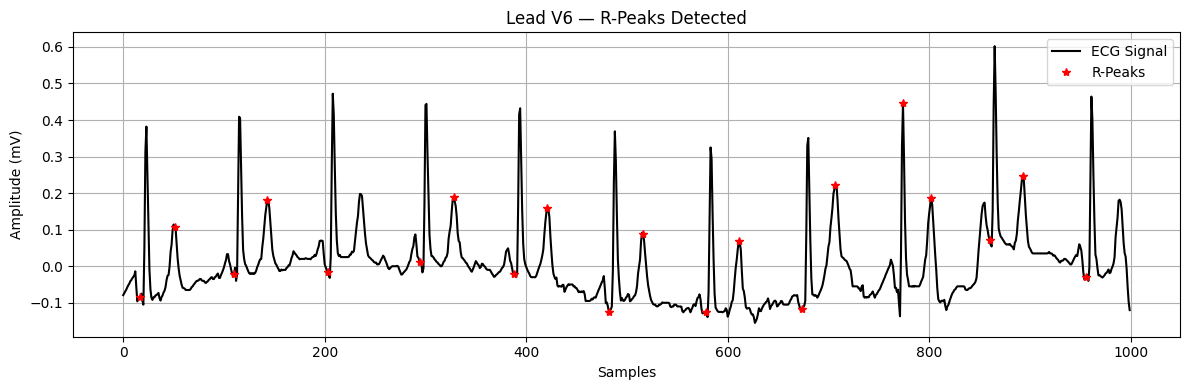

Lead V6 — Avg Heart Rate: 137.0 bpm, Std: 46.0 bpm


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import wfdb.processing as wfproc

fs = record.fs
leads = signal_df.columns

for lead in leads:
    signal = signal_df[lead].values

    try:
        r_peaks = wfproc.xqrs_detect(sig=signal, fs=fs)
        r_peaks = r_peaks.astype(int)
    except Exception as e:
        print(f"⚠ Could not detect R-peaks for {lead}: {e}")
        continue

    plt.figure(figsize=(12, 4))
    plt.plot(signal, color='black', label='ECG Signal')
    plt.plot(r_peaks, signal[r_peaks], 'r*', markersize=6, label='R-Peaks')
    plt.title(f"Lead {lead} — R-Peaks Detected")
    plt.xlabel("Samples")
    plt.ylabel("Amplitude (mV)")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

    rr_intervals = np.diff(r_peaks) / fs   
    hr = 60 / rr_intervals
    print(f"Lead {lead} — Avg Heart Rate: {np.mean(hr):.1f} bpm, Std: {np.std(hr):.1f} bpm")


🔍 Found 21799 PTB-XL ECG records (100Hz).


Processing ECGs:   0%|          | 0/21799 [00:00<?, ?it/s]


✅ SNR results saved to: /kaggle/working/ptbxl_snr.csv


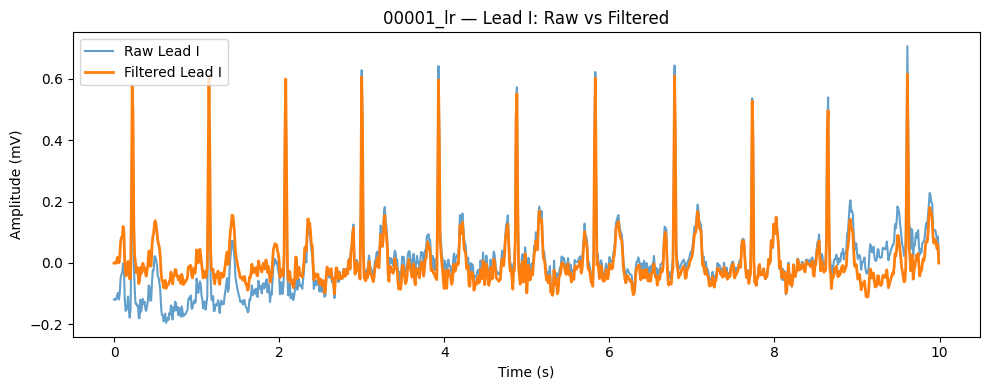

In [ ]:
!pip install wfdb --quiet

import os
import numpy as np
import pandas as pd
from scipy.signal import butter, filtfilt
import wfdb
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

def bandpass_filter(signal, fs, lowcut=0.5, highcut=40.0, order=4):
    nyq = 0.5 * fs
    b, a = butter(order, [lowcut / nyq, highcut / nyq], btype="band")
    return filtfilt(b, a, signal, axis=0)

def compute_snr_per_lead(signal, fs=100):
    if signal.shape[0] == 12 and signal.shape[1] != 12:
        signal = signal.T
    filtered = bandpass_filter(signal, fs)
    noise = signal - filtered
    signal_power = np.mean(filtered**2, axis=0)
    noise_power = np.mean(noise**2, axis=0)
    snr = 10 * np.log10(signal_power / (noise_power + 1e-12))
    return snr, filtered

def load_ecg_ptbxl(path_no_ext):
    """
    Load ECG from PTB-XL dataset (.hea + .dat)
    """
    hea_path = path_no_ext + ".hea"
    dat_path = path_no_ext + ".dat"
    
    if os.path.exists(hea_path) and os.path.exists(dat_path):
        record = wfdb.rdrecord(path_no_ext)
        return record.p_signal, record.fs
    else:
        raise FileNotFoundError(f"No ECG found for {path_no_ext}")

def compute_ptbxl_snr(dataset_path, fs=100, show_plot=True, csv_name="ptbxl_snr.csv"):
    for root, _, files in os.walk(dataset_path):
        for f in files:
            if f.endswith("_lr.hea"):
                ecg_files.append(os.path.join(root, f.replace(".hea", "")))
    ecg_files = sorted(ecg_files)
    print(f"🔍 Found {len(ecg_files)} PTB-XL ECG records (100Hz).")

    all_results = []
    lead_names = [f"Lead_{i+1}" for i in range(12)]

    for fpath in tqdm(ecg_files, desc="Processing ECGs"):
        try:
            signal, fs_actual = load_ecg_ptbxl(fpath)
            snr, _ = compute_snr_per_lead(signal, fs_actual)
            mean_snr = np.mean(snr)
            record_name = os.path.basename(fpath)
            all_results.append([record_name] + list(np.round(snr,3)) + [np.round(mean_snr,3)])
        except Exception as e:
            print(f"❌ {fpath}: {e}")

    df_snr = pd.DataFrame(all_results, columns=["Record"] + lead_names + ["Mean_SNR(dB)"])
    save_path = os.path.join("/kaggle/working", csv_name)
    df_snr.to_csv(save_path, index=False)
    print(f"\n✅ SNR results saved to: {save_path}")

    if show_plot and len(all_results) > 0:
        first_rec = all_results[0][0]
        first_path = [p for p in ecg_files if os.path.basename(p) == first_rec][0]
        sig, fs_actual = load_ecg_ptbxl(first_path)
        _, filtered = compute_snr_per_lead(sig, fs_actual)
        t = np.arange(sig.shape[0]) / fs_actual
        plt.figure(figsize=(10,4))
        plt.plot(t, sig[:,0], label="Raw Lead I", alpha=0.7)
        plt.plot(t, filtered[:,0], label="Filtered Lead I", linewidth=2)
        plt.title(f"{first_rec} — Lead I: Raw vs Filtered")
        plt.xlabel("Time (s)")
        plt.ylabel("Amplitude (mV)")
        plt.legend()
        plt.tight_layout()
        plt.show()

    return df_snr

dataset_path = '/kaggle/input/ptb-xl-a-large-scale-ecg/ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.3'
df_snr = compute_ptbxl_snr(dataset_path, fs=100, show_plot=True, csv_name="ptbxl_snr.csv")



🔍 Found 21799 PTB-XL ECG records (100Hz).


Processing ECGs:   0%|          | 0/21799 [00:00<?, ?it/s]


✅ SNR results saved to: /kaggle/working/ptbxl_snr_results.csv


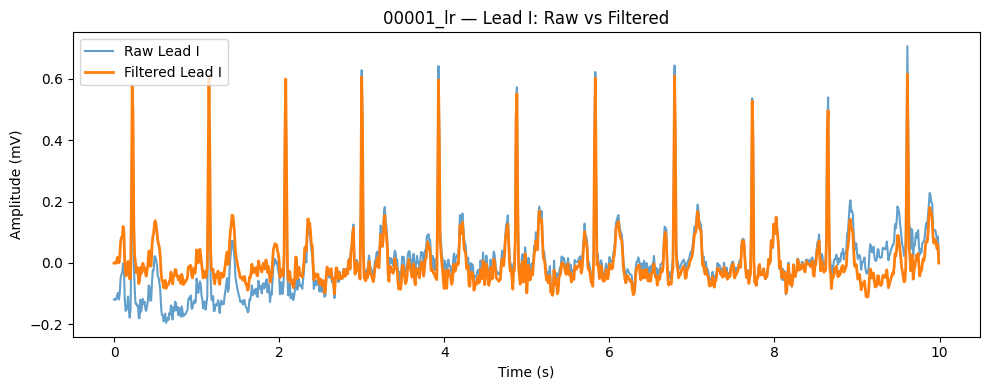

In [ ]:
dataset_dir = "/kaggle/input/ptb-xl-a-large-scale-ecg/ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.3"

results_df = compute_ptbxl_snr(
    dataset_path=dataset_dir,  
    fs=100,                  
    show_plot=True,           
    csv_name="ptbxl_snr_results.csv"
)


🔍 Found 21799 PTB-XL ECG records (100Hz).


Processing ECGs:   0%|          | 0/21799 [00:00<?, ?it/s]


✅ SNR results saved to: /kaggle/working/ptbxl_snr_results.csv


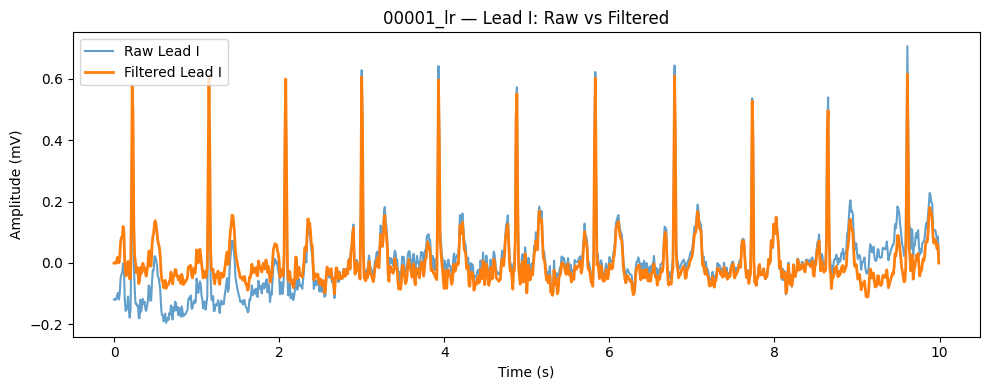

Record  Lead_1  Lead_2  Lead_3  Lead_4  Lead_5  Lead_6  Lead_7  Lead_8  \
0  00001_lr   4.919   7.572  -1.105   6.784   2.410   3.070  15.536  21.907   
1  00002_lr   5.981   2.792  -1.260   4.991  -0.025   0.762   9.522  18.290   
2  00003_lr  16.467   0.027  -4.934   6.254   3.400  -4.937   9.131  11.705   
3  00004_lr  14.773  -2.294  -4.688   0.671  -4.120  -3.712   0.588   9.738   
4  00005_lr  11.940   3.004   0.911   4.875   0.324   1.932  10.365  14.711   

   Lead_9  Lead_10  Lead_11  Lead_12  Mean_SNR(dB)  
0  12.484   13.769   16.434    4.777         9.046  
1  13.037   11.095   12.463   10.872         7.377  
2  10.784    9.855    8.700    5.014         5.956  
3  11.347   10.762    8.452    6.029         3.962  
4  11.327   10.521    9.901   11.208         7.585

In [ ]:

dataset_dir = "/kaggle/input/ptb-xl-a-large-scale-ecg/ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.3"

results_df = compute_ptbxl_snr(
    dataset_path=dataset_dir,  
    fs=100,                    
    show_plot=True,           
    csv_name="ptbxl_snr_results.csv"
)

display(results_df.head())


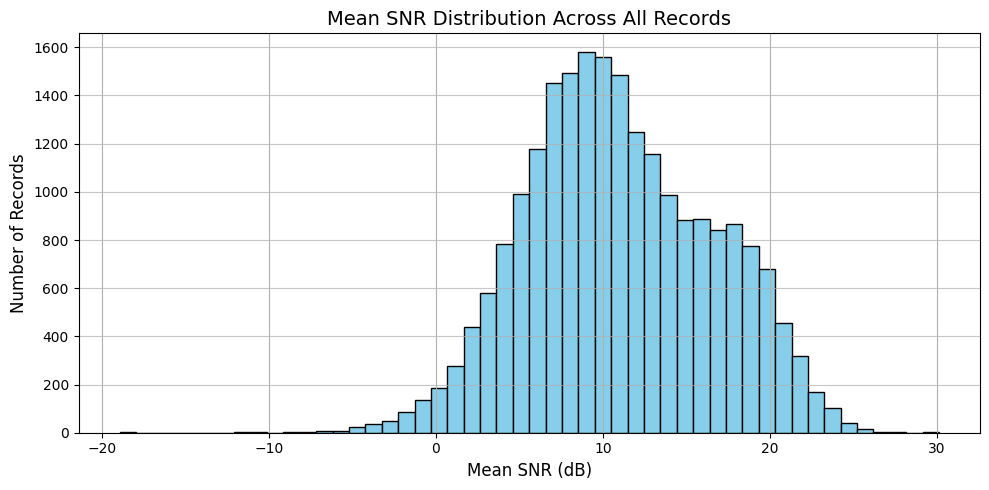

<Figure size 1200x600 with 0 Axes>

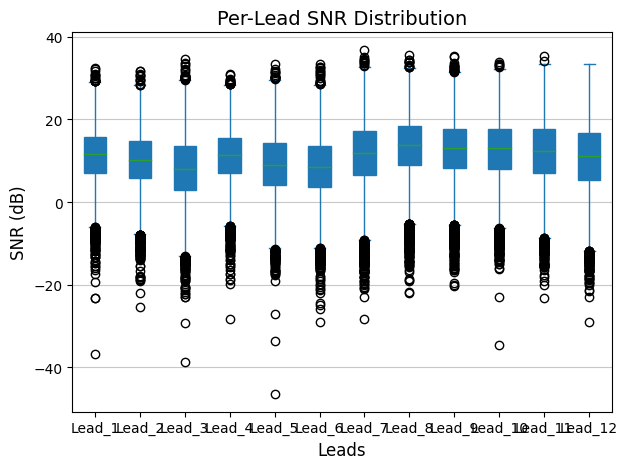

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

results_df_clean = results_df.replace([np.inf, -np.inf], np.nan).dropna(subset=["Mean_SNR(dB)"])

plt.figure(figsize=(10,5))
results_df_clean["Mean_SNR(dB)"].hist(bins=50, color='skyblue', edgecolor='black')
plt.title("Mean SNR Distribution Across All Records", fontsize=14)
plt.xlabel("Mean SNR (dB)", fontsize=12)
plt.ylabel("Number of Records", fontsize=12)
plt.grid(axis='y', alpha=0.7)
plt.tight_layout()
plt.show()

lead_cols = [f"Lead_{i+1}" for i in range(12)]
plt.figure(figsize=(12,6))
results_df_clean[lead_cols].plot.box(vert=True, patch_artist=True)
plt.title("Per-Lead SNR Distribution", fontsize=14)
plt.ylabel("SNR (dB)", fontsize=12)
plt.xlabel("Leads", fontsize=12)
plt.grid(axis='y', alpha=0.7)
plt.tight_layout()
plt.show()

